## Kvanttilaskenta 2021 laskuharjoitukset kierros 3

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

Kierroksella 3 kerrataan ja täydennetään yhden kubitin kvanttipiirin porttien toimintaa, ja tutustutaan kahden kubitin tilan esittämisene ja kahden kubitin CNOT-portin toimintaan.


Kierroksen kolme tehtävissä eräänä tavoitteena on tutkia miten erilaisten kvanttiporttien operaatiot vaikuttavat kubitin kvanttitilaa esittävään tilavektoriin Blochin pallolla. Sen takia on tärkeää tutkia tehtävien ratkaisuja myös <a href="https://bloch.ollpu.fi/" target="_blank">Blochin palloa kuvaavan simulaation avulla.</a>. 

## Johdanto tehtävävään 1, eli painotetun kolikon heitto ja z-akselin ympäri tapahtuva kierto

Tarkastellaan yhden kubitin kvanttipiiriä, jonka avulla halutaan toteuttaa kruuna (kubitin tila |1>) klaava ( kubitin tila |0>) kolikonheitto siten, että lopputuloksen |1> todennäköisyys on $\frac{2}{3}$ ja tilan |0> todennäköisyys $\frac{1}{3}$. Olkoon kubitin alkutila $1|0>+ 0|1>$.

Kubitin tilan mittaustulosta eli arvojen |0>  tai  |1> esiintymistodennäköisyyksiä voidaan muuttaa ja säätää halutuksi $R_y$-kvanttiportilla, joka vastaa kubitin kiertoa Blochin pallolla y-akselin ympäri. Kun alkutilassa |0> olevaa kubittia kierretään $R_y$-portilla, muuttuvat samalla kubitin tilavektorin kertoimet eli todennäköisyydet. Esimerkiksi, jos kubitin tila $R_y$-kierron jälkeen on $\frac{\sqrt{6}}{3} |0>+ \frac{1}{\sqrt{3}}|1>$, niin



tarkoittaa tämä, että kubitin tilavektorin kärki on Blochin pallolla ”lähempänä” tilaa |0> ja lopputilojen todennäköisyydet

$P(0)=(\frac{\sqrt{6}}{3})^2 = \frac{2}{3}$ ja $P(1)=(\frac{1}{\sqrt{3}})^2 = \frac{1}{3}$. Mohdollisten tilojen  todennäköisyyksien summa säilyy: $P(0)+P(1)=\frac{2}{3} +\frac{1}{3} = 1 $.




Ry-porttin vaikutus pystyvektorin tilaan voidaan kuvata kiertomatriisilla:
![Ry_matriisi](images/Ry_matriisi.png)

missä kulma $\theta$ ilmaisee kuinka suuri kierto on tehty y-akselin ympäri. Operoidaan Ry-kiertomatriisilla kubitin alkutilaan |0>:
![Ry_tulo](images/Ry_tulo.png)

Kierron jälkeen kubitin tila voidaan esittää siis muodossa
![state3](images/state3.png)

Nyt voidaan ratkaista kiertokulma $\theta$ kubitin tilojen |0> ja |1>  todennäköisyyksistä
![Ry_tn](images/Ry_tn.png)

eli 

![Ry_tn3](images/Ry_tn3.png)

Ry-portilla toteutetaan siis 1.91 radiaanin eli  109 asteen kierto y-akselin ympäri. Alla on esimerkin yhden kubitin piirin toteutus pyhtonilla. Koodissa luodaan yhden kubitin kvanttipiiri, kierrettään tilavektoria ja simuloidaan piirin toiminta. Lopuksi piirretään mittaustulosten todennäköisyyjakauma. $R_y$ portin toteutus qiskitissä on metodi `circuit.ry(theta)`.

In [4]:
from qiskit import *
import math

# Luodaan kvanttipiiri muuttujaan circ, jossa on yksi kubitti (diagrammissa q).
quantum_register = QuantumRegister(1)
classical_register = ClassicalRegister(1)
circuit = QuantumCircuit(quantum_register, classical_register)  # kubitin alkutila on |0>


In [5]:
circuit.ry(2 * math.asin(math.sqrt(2/3)), 0)

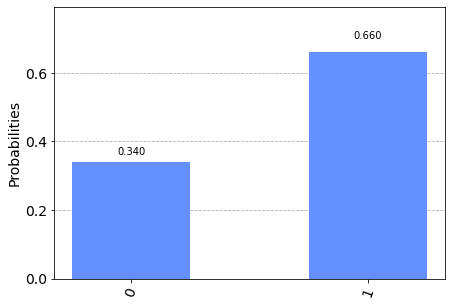

In [6]:
circuit.measure(quantum_register, classical_register)
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## Tehtävä 1

a) Mihin kulmaan kubitin tilavektori on kierrettävä $R_y$-portilla, jos lopputilan |1> todennäköisyydeksi halutaan $\frac{3}{4}$?

b) Simuloi a-kohdan piirin toiminta ja piirrä todennäköisyysjakauma pylväsdiagrammina.


## Tehtävä 2 yhden kubitin S ja T-portit

Tutki <a href="https://bloch.ollpu.fi/" target="_blank">Blochin palloa kuvaavan simulaation avulla </a> kuinka S-portti kiertää alukutilassa |0> olevaa kubittia $\pi/2$ eli $90$ astetta z-akselin ympäri. S-portin matriisi esitys on seuraava: 
![s-portti](images/s-portti.png)

a) Tutki simulaatiolla, ja laske pythonin avulla, $SS |0> = Z |0>$, missä Z-portti on:
![s-portti](images/z-portti.png)

Tulos tarkoittaa, että kaksi peräkkäistä S-portin operaatiota vastaa yhteensä 180 kiertoa.

In [14]:
# laske a-kohdan tulot tähän pythonilla, katso esimerkkiä kierroksen 1 ratkaisuista. 
# matriisin ja pystyvektorin tulossa kertomerkki on @
import numpy as np
import math

z = complex(0,math.pi) # Määritellään kompleksiluku i*pi, reaaliosa on 0
S =  np.array([[1, 0],[0, np.exp(z/2)]]) #np.exp() on eksponenttifunktion kantalukuna käytetty Neperin luku e.

# määritellään pystyvektorina kubitin kvanttitila 0:
q0 = np.array([[1],[0]])

# Laske tähän SS|0> . Matriisien kertomerkki on @ 

b) Tutki <a href="https://bloch.ollpu.fi/" target="_blank">Blochin palloa kuvaavan simulaation avulla </a> kuinka T-portti 
kiertää alukutilassa |0> olevaa kubittia $\pi/4$ eli $45$ astetta z-akselin ympäri. T-portin matriisi esitys on seuraava: 
![s-portti](images/t-portti.png)

Alla on S ja T-portin toteutus qiskit-kirjastossa:

In [16]:
qc1 = QuantumCircuit(1)
qc1.s(0) # operoidaan S-portilla kubittiin
qc1.draw()

┌───┐
q_0: ┤ S ├
     └───┘

In [18]:
qc2 = QuantumCircuit(1)
qc2.t(0)  # Operoidaan T-portilla kubittiin
qc2.draw()

┌───┐
q_0: ┤ T ├
     └───┘

## Tehtävä 3

Tehtävät 1 - 3 käsittelivät yhden kubitin systeemiä. Seuraavassa kahdessa tehtävässä tarkastelemme controlled NOT -porttia ($\mathit{CNOT}$), joka on kahden kubitin välinen operaatio. Kahden kubitin kvanttipiirissä systeemin tila esitetään seuraavilla kantavektoreilla:

$$
\ket{00},\ \ket{01},\ \ket{10},\ \ket{11}, 
$$

missä 

$$
\ket{00}=\pmatrix{1 \\ 0 \\ 0 \\0},\ \ket{01}=\pmatrix{0 \\ 1 \\ 0 \\0},\ 
\ket{10}=\pmatrix{0 \\ 0 \\ 1 \\0},\ \ket{11}=\pmatrix{0 \\ 0 \\ 0 \\1}.
$$

$\mathit{CNOT}$-portin operoidessa ensimmäinen qubitti on ns. ohjaava kubitti (control qubi1t), ja jälkimmäinen on kohdekubitti (target qubit). $\mathit{CNOT}$ vaikuttaa koko systeemin tilaan seuraavasti:

$$
\ket{00} \rightarrow  \ket{00}   \\
\ket{01} \rightarrow  \ket{01}   \\
\ket{10} \rightarrow  \ket{11}   \\
\ket{11} \rightarrow  \ket{10}   \\
$$

Tulos tarkoittaa, että jos ensimmäinen, ns. ohjaava kubitti on $0$, niin kohdekubitin tila ei muutu. Jos ohjaavakubitti $1$, niin kohdekubitin tila muuttuu. 

$\mathit{CNOT}$-portin matriisiesitys on seuraava:

$$
\mathit{CNOT} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} 
$$

Huomaa, että vaikka matriisia merkitään monella kirjaimella, se ei ole monen matriisin tulo.

Piirrosmerkki, jossa ylempänä esitetty kubitti on ohjaava, ja alempi toimii kohteena:

![cnot](https://ollpu.fi/kvanttilaskenta-static/cnot.png)

a) Laske CNOT-matriisin ja 2 kubitin tilaa kuvaavan pystyvektorin tulo, ja osoita että 

$$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$


<a href="https://youtu.be/rLF-oHaXLtE" target="_blank">ohjevideo CNOT-portin toiminnasta</a>



In [22]:
import numpy as np

CNOT =  np.array([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])

# määritellään pystyvektorina kubitin kvanttitila |00>:
q00 = np.array([[1],[0],[0],[0]])

# määritellään pystyvektorina kubitin kvanttitila |01>:
q01 = np.array([[0],[1],[0],[0]])

# |10>
q10 = np.array([[0],[0],[1],[0]])

# |11>

q11 = np.array([[0],[0],[1],[0]])
# matriisin ja pystyvektorin tulo numpyssä on @ merkki

 b)-kohta: Suorita alla olevat qiskit koodit, joiden avulla on ohjelmoitu kahden kubitin kvanttipiiri, jossa on CNOT-portti. Simuloi piiri, ja tunnista missä tilanteissa ohjaavakubitti vaihtaa kohdekubitin tilaa. Vertaa piirin toimintaa ket-merkintään:
 
 $$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$


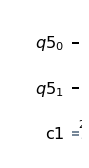

In [23]:
# Valmis esimerkkikoodi tehtävään 1 suoritettavaksi.
# Etene vaiheittain, suorita koodilohkot painamalla Run-nappia ylhäältä.

from qiskit import *

quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)

%matplotlib inline
circuit.draw(output='mpl')

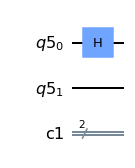

In [24]:
# Lisätään Hadamard-portti H 
circuit.h(quantum_register[0])
circuit.draw(output='mpl')

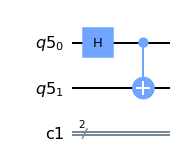

In [25]:
# Lisätään kvanttipiiriin CNOT-portti cx()-komennolla
circuit.cx(quantum_register[0], quantum_register[1])
circuit.draw(output='mpl')

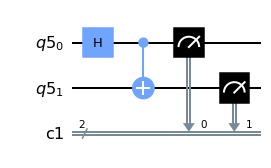

In [26]:
# Mitataan molemmat kubitit, ja tallennetaan tulokset klassiseen rekisteriin
circuit.measure(quantum_register, classical_register)
circuit.draw(output='mpl')

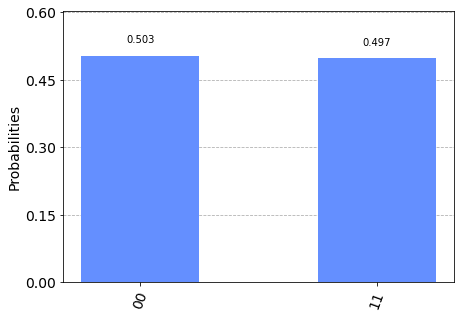

In [27]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Perustele tähän lyhyesti miksi saamme vain tuloksia 00 ja 11? Mitä tarkoittaa kahden ohjaavan kubitin ja kohdekubitin lomittuminen?

## Tehtävä 4
Tehtävässä kaksi tutustutaan yleiseen kvanttipiirin avulla toteutettuun kvanttitilan teleportaatioon.

### Quantum teleportation eli kvanttiteleportaatio ja kubittien lomittuminen
Kvanttiteleportaation avulla voidaan siirtää kubitin tila fyysisesti kauas tietyillä esivalmisteluilla. Kvanttiteleportaatio perustuu kubittien lomittumiseen, eli kubittien väliseen kytkentään kvanttisysteemissä.

![teleportation](images/teleportation.png)

Kuvan kvanttipiirissä siirretään kubitin 0 tila kubitiin 2, paikasta A paikkaan B. Alla aiheesta tutoriaalivideo.

Ensin luodaan kubitin 1 ja 2 välille ns. Bellin pari eli lomitus Hadamard- ja CNOT-porttien avulla. Tämä pari luodaan esimerkiksi paikassa A, jonka jälkeen kubitti 2 siiretään fysisesti paikkaan B. 

Kun kubitin 0 tila halutaan siirtää kubitiin 2, niin paikassa A suoritetaan sarja operaatiota kubiteille 0 ja 1.  

Kubittien 0 ja 1 tilat mitatataan ja klassiset mittaustulokset lähetetään paikkaan B.

Mittaustuloksista riippuen paikassa B tehdään eri sarja operaatioita kubitille 2. Lopputuloksena kubitin 2 tila on sama kuin kubitin 0 alkuperäinen tila.


a) Katso tutoriaalivideo ja rakenna 3:n kubitin systeemi. Simuloi piirin toiminta.

Tutoriaalivideo:
<a href="https://youtu.be/mMwovHK2NrE" target="_blank">Kvanttiteleportaation qiskit-tutoriaali</a>

Videossa lähetetään ensin tila $\ket 1$ kubitista 0 kubittiin 2. Tämä tila saadaan aikaan yhdellä X-portilla alussa.

Lopun mittaustuloksissa nähdään ainoastaan tiloja, joissa kubitti 2 (binäärimerkkijonon ensimmäinen merkki) on 1, eli tila näyttäisi siirtyneen oikein. Muut kaksi bittiä ovat sattumanvaraisia.

b) Luo piiri uudestaan erilaisella alkutilalla, ja tutki tuloksia.
Jos muokkaat alkuperäistä koodia, aja jokainen solu uudestaan järjestyksessä, jotta saat uuden piirin.

Kirjaa saamasi tulokset muistiin esimerkiksi alle.

**OHJE:**
Jos sinulla on vaikeuksia koodata tutoriaalivideon avulla, niin voit käyttää apuna alla olevissa koodisolouissa olevaa valmista koodia.

In [ ]:
from qiskit import *
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output='mpl')

In [ ]:
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport
circuit.barrier()
circuit.draw(output='mpl')

In [ ]:
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

In [ ]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

In [ ]:
# Step 3: Alice measures both qubits 0 and 1
circuit.barrier()
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1
circuit.draw(output='mpl')

In [ ]:
circuit.barrier()
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

In [ ]:
# Step 5: Done! Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2])
circuit.draw(output='mpl')

In [ ]:
print(counts)

## Vapaaehtoinen lisätehtävä 5
Tutustu qiskitin tutoriaalin kohtiin 1 ja 2, jossa käsitellään monen kubitin systeemejä. Lataa Jupyter-notebook linkistä. Tiedosto löytyy valmiina koodikoulu.net-palvelusta.

<a href ="https://qiskit.org/textbook/content/ch-gates/multiple-qubits-entangled-states.ipynb">Qiskitin tutoriaali</a>